# 1. Environment Configuration
## 1.1 Modules load

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import sklearn_pandas #collection of machine learning algorithms
print("scikit-learn pandas bridge version: {}". format(sklearn_pandas.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.3 (default, Dec 20 2019, 18:57:59) 
[GCC 8.3.0]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.18.1
scikit-learn version: 0.23.2
scikit-learn pandas bridge version: 2.0.2


## 1.2 Components configuration (visualization)

In [2]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 1.3 Components configuration (ML and helpers)

In [3]:
from sklearn import svm
from sklearn.metrics import (
    classification_report, accuracy_score, plot_confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn_pandas import DataFrameMapper

## 1.4 Local and remote data sources definition

In [4]:
LOCAL_DATA='./data/'
REMOTE_BUCKET='gs://bbs-2020-aiml4b-base-mldata'

# 2 Data Inspection

## 2.1 Data access

In [5]:
import os
os.makedirs(LOCAL_DATA, exist_ok=True)
!gsutil cp -r $REMOTE_BUCKET/* $LOCAL_DATA

Copying gs://bbs-2019-aiml4b-base-mldata/gender_submission.csv...
Copying gs://bbs-2019-aiml4b-base-mldata/test.csv...
Copying gs://bbs-2019-aiml4b-base-mldata/train.csv...

Operation completed over 3 objects/90.9 KiB.                                     


## 2.2 Data load

In [6]:
raw_data = pd.read_csv(os.path.join(LOCAL_DATA,'train.csv'))

### 2.2.1 Data Attributes (structure)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### An explanation of attributes (features/labels?)

- **PASSENGER ID** Passenger identification number

- **SURVIVED** Whether the passenger survived or not

- **PCLASS** Ordinal variable (upper, middle, lower class)

- **NAME** String following the template: "<Surname>, <Title>. <Name>" 

- **SEX** "male" or "female"

- **AGE** Passenger's age

- **SIBSP** Number of related **sib**lings/**sp**ouse aboard

- **PARCH** Number of related **par**ents/**ch**ildren aboard

- **TICKET** The ticket number / code

- **FARE** It's the fare paid by the passenger for the ticket

- **CABIN** Assigned Cabin

- **EMBARKED** The Port (C: Cherbourg, Q: Queenstown, S: Southhampton) where the passenger was embarked


### 2.2.2 Data Preview (10 records)

In [8]:
raw_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S


### 2.2.3 Statistical Properties Overview

In [9]:
raw_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Watson, Mr. Ennis Hastings",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


2.2.4 Pandas Profiling

In [10]:
import pandas as pd

import pandas as pd
import pandas_profiling

INPUT='data/train.csv'
OUTPUT='data/report.html'

df = pd.read_csv(INPUT)

profile = pandas_profiling.ProfileReport(df)
profile.to_file(OUTPUT)

## 2.3 Features and target definition

In [11]:
RAW_FEATURES = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
IDS = ['PassengerId']
TARGET = ['Survived']
# dropped: Ticket, Cabin

In [12]:
df_features = raw_data[IDS + RAW_FEATURES]
df_labels = raw_data[IDS + TARGET]

In [13]:
df_features.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
157,158,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S
414,415,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,7.9250,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S
366,367,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,75.2500,C
98,99,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,23.0000,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S
499,500,3,"Svensson, Mr. Olof",male,24.0,0,0,7.7958,S
645,646,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,76.7292,C
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,7.8958,S
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,81.8583,S


In [14]:
df_labels.sample(10)

,PassengerId,Survived
382,383,0
172,173,1
613,614,0
446,447,1
268,269,1
84,85,1
142,143,1
706,707,1
578,579,0
727,728,1


In [15]:
df_labels.groupby(["Survived"]).agg(['count'])/df_labels.shape[0]*100

,PassengerId
,count
Survived,
0,61.616162
1,38.383838


# 3 Data Imputation

## 3.1 NULL values

In [16]:
print('Train columns with null values:\n', df_features.isnull().sum())

Train columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [17]:
mapper = DataFrameMapper([
    (['Age'], SimpleImputer(strategy='median')),
    (['Fare'], SimpleImputer(strategy='median')),
    (['Embarked'], SimpleImputer(strategy='most_frequent')),
], df_out=True, default=None)

In [18]:
df_features = mapper.fit_transform(df_features)

In [19]:
print('Train columns with null values:\n', df_features.isnull().sum())

Train columns with null values:
 Age            0
Fare           0
Embarked       0
PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
dtype: int64


# 4 Feature Engineering

In [20]:
df_features.sample(10)

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch
114,17.00,14.4583,C,115,3,"Attalah, Miss. Malake",female,0,0
78,0.83,29.0000,S,79,2,"Caldwell, Master. Alden Gates",male,0,2
720,6.00,33.0000,S,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,0,1
854,44.00,26.0000,S,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,1,0
627,21.00,77.9583,S,628,1,"Longley, Miss. Gretchen Fiske",female,0,0
462,47.00,38.5000,S,463,1,"Gee, Mr. Arthur H",male,0,0
729,25.00,7.9250,S,730,3,"Ilmakangas, Miss. Pieta Sofia",female,1,0
388,28.00,7.7292,Q,389,3,"Sadlier, Mr. Matthew",male,0,0
456,65.00,26.5500,S,457,1,"Millet, Mr. Francis Davis",male,0,0
879,56.00,83.1583,C,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,0,1


## 4.1 FamilySize
Calculated field that comes from summing up the passenger itself, its siblings/spouse and its parents/children aboard with it

In [21]:
def eval_family_size(SibSp: pd.Series, Parch: pd.Series) -> pd.Series:
    """
    Evaluate the family size for each item
    """
    return (SibSp + Parch + 1).astype('int64') 

In [22]:
df_features['FamilySize'] = eval_family_size(df_features.SibSp, df_features.Parch)

In [23]:
df_features.sample(10)

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize
498,25.0,151.5500,S,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,4
295,28.0,27.7208,C,296,1,"Lewy, Mr. Ervin G",male,0,0,1
688,18.0,7.7958,S,689,3,"Fischer, Mr. Eberhard Thelander",male,0,0,1
431,28.0,16.1000,S,432,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,1,0,2
285,33.0,8.6625,C,286,3,"Stankovic, Mr. Ivan",male,0,0,1
389,17.0,12.0000,C,390,2,"Lehmann, Miss. Bertha",female,0,0,1
593,28.0,7.7500,Q,594,3,"Bourke, Miss. Mary",female,0,2,3
774,54.0,23.0000,S,775,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,1,3,5
622,20.0,15.7417,C,623,3,"Nakid, Mr. Sahid",male,1,1,3
685,25.0,41.5792,C,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,1,2,4


## 4.2 IsAlone
One more "calculation" to mark which passengers were travelling alone

In [24]:
df_features['IsAlone'] = df_features.apply(lambda x: 0 if x.FamilySize > 1 else 1, axis = 1)

## 4.3 Title

NAME variable is formattes as \<Surname\>, \<Title\>. \<Name\>.
Let's isolate the "Title" token.

In [25]:
def title_extractor(name: pd.Series) -> pd.Series:
    """
    Returns the title
    """
    return name.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [26]:
df_features['Title'] = title_extractor(df_features.Name)

In [27]:
df_features.head()

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
0,22.0,7.2500,S,1,3,"Braund, Mr. Owen Harris",male,1,0,2,0,Mr
1,38.0,71.2833,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,2,0,Mrs
2,26.0,7.9250,S,3,3,"Heikkinen, Miss. Laina",female,0,0,1,1,Miss
3,35.0,53.1000,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,2,0,Mrs
4,35.0,8.0500,S,5,3,"Allen, Mr. William Henry",male,0,0,1,1,Mr


### 4.3.1 Rare values

They call it the *Long Tail*

In [28]:
df_features['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Jonkheer          1
Sir               1
the Countess      1
Mme               1
Lady              1
Capt              1
Ms                1
Name: Title, dtype: int64

In [29]:
serie = df_features['Title'].value_counts()
title_names = serie[serie >= 10 ].index.to_list()
print(title_names)

['Mr', 'Miss', 'Mrs', 'Master']


In [30]:
# Filter long tail on Title
df_features['Title'] = df_features['Title'].apply(lambda x: x if x in title_names else 'Misc')

Let's check our work

In [31]:
df_features['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

## 4.4 Feature Engineering Check

In [32]:
df_features.sample(10)

,Age,Fare,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
362,45.0,14.4542,C,363,3,"Barbara, Mrs. (Catherine David)",female,0,1,2,0,Mrs
418,30.0,13.0000,S,419,2,"Matthews, Mr. William John",male,0,0,1,1,Mr
358,28.0,7.8792,Q,359,3,"McGovern, Miss. Mary",female,0,0,1,1,Miss
735,28.5,16.1000,S,736,3,"Williams, Mr. Leslie",male,0,0,1,1,Mr
256,28.0,79.2000,C,257,1,"Thorne, Mrs. Gertrude Maybelle",female,0,0,1,1,Mrs
155,51.0,61.3792,C,156,1,"Williams, Mr. Charles Duane",male,0,1,2,0,Mr
73,26.0,14.4542,C,74,3,"Chronopoulos, Mr. Apostolos",male,1,0,2,0,Mr
257,30.0,86.5000,S,258,1,"Cherry, Miss. Gladys",female,0,0,1,1,Miss
680,28.0,8.1375,Q,681,3,"Peters, Miss. Katie",female,0,0,1,1,Miss
71,16.0,46.9000,S,72,3,"Goodwin, Miss. Lillian Amy",female,5,2,8,0,Miss


# 5 BINNING

Check and bin (transform a numerical feature to a categorical one) both AGE and FARE

## 5.1 FARE

<AxesSubplot:>

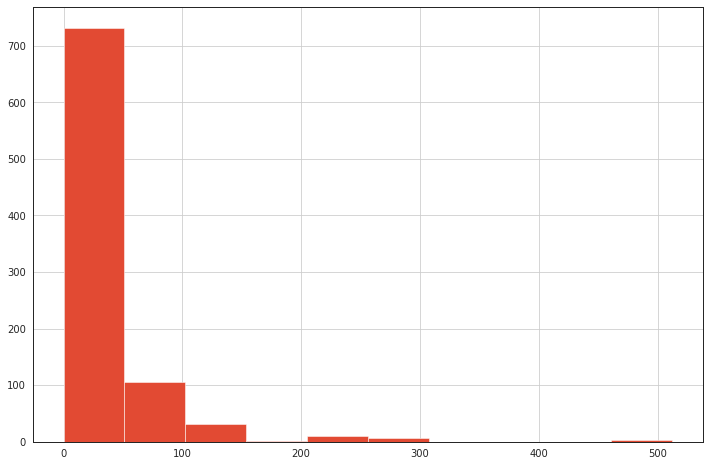

In [33]:
df_features['Fare'].hist()

## 5.2 AGE

<AxesSubplot:>

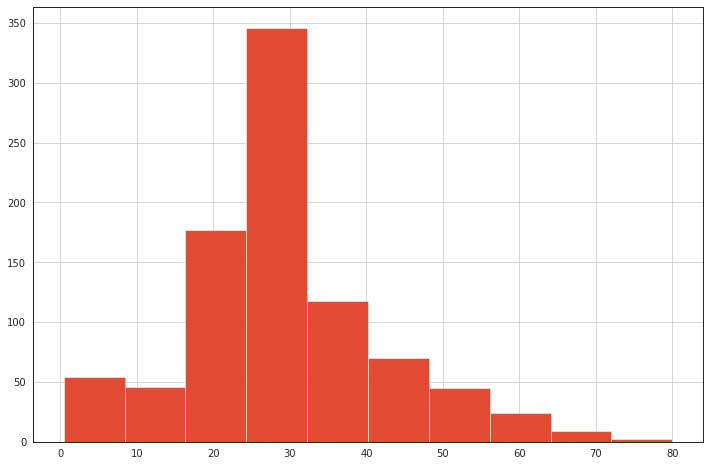

In [34]:
df_features['Age'].hist()

In [35]:
mapper_quantizer = DataFrameMapper([
    (['Age'], KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal'), {'suffix': '_Bin'}),
    (['Fare'], KBinsDiscretizer(n_bins=4, strategy='quantile', encode='ordinal'), {'suffix': '_Bin'}),
], df_out=True, default=None)

In [36]:
df_features = mapper_quantizer.fit_transform(df_features)

In [37]:
df_features.sample(20)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
175,1.0,0.0,S,176,3,"Klasen, Mr. Klas Albin",male,1,1,3,0,Mr
629,1.0,0.0,Q,630,3,"O'Connell, Mr. Patrick D",male,0,0,1,1,Mr
431,1.0,2.0,S,432,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,1,0,2,0,Mrs
263,2.0,0.0,S,264,1,"Harrison, Mr. William",male,0,0,1,1,Mr
881,2.0,0.0,S,882,3,"Markun, Mr. Johann",male,0,0,1,1,Mr
205,0.0,1.0,S,206,3,"Strom, Miss. Telma Matilda",female,0,1,2,0,Miss
134,1.0,1.0,S,135,2,"Sobey, Mr. Samuel James Hayden",male,0,0,1,1,Mr
807,1.0,0.0,S,808,3,"Pettersson, Miss. Ellen Natalia",female,0,0,1,1,Miss
826,1.0,3.0,S,827,3,"Lam, Mr. Len",male,0,0,1,1,Mr
856,2.0,3.0,S,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,1,1,3,0,Mrs


<AxesSubplot:>

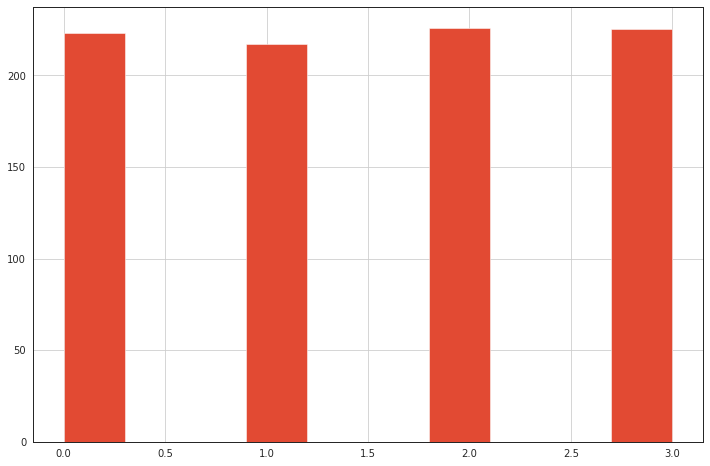

In [38]:
df_features.Fare_Bin.hist()

In [39]:
df_features[['Fare_Bin']].groupby(['Fare_Bin']).size()

Fare_Bin
0.0    223
1.0    217
2.0    226
3.0    225
dtype: int64

<AxesSubplot:>

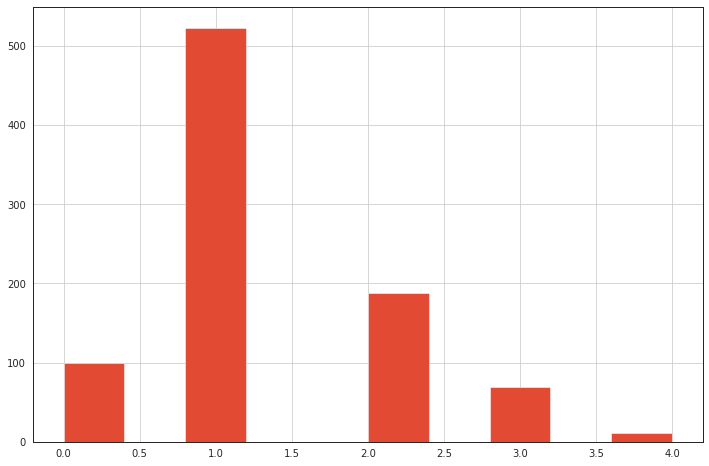

In [40]:
df_features.Age_Bin.hist()

In [41]:
df_features.sample(10)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,FamilySize,IsAlone,Title
772,3.0,1.0,S,773,2,"Mack, Mrs. (Mary)",female,0,0,1,1,Mrs
738,1.0,0.0,S,739,3,"Ivanoff, Mr. Kanio",male,0,0,1,1,Mr
307,1.0,3.0,C,308,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,1,0,2,0,Mrs
645,2.0,3.0,C,646,1,"Harper, Mr. Henry Sleeper",male,1,0,2,0,Mr
113,1.0,1.0,S,114,3,"Jussila, Miss. Katriina",female,1,0,2,0,Miss
534,1.0,1.0,S,535,3,"Cacic, Miss. Marija",female,0,0,1,1,Miss
28,1.0,0.0,Q,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,1,1,Miss
618,0.0,3.0,S,619,2,"Becker, Miss. Marion Louise",female,2,1,4,0,Miss
191,1.0,1.0,S,192,2,"Carbines, Mr. William",male,0,0,1,1,Mr
889,1.0,2.0,C,890,1,"Behr, Mr. Karl Howell",male,0,0,1,1,Mr


In [42]:
df_features.drop(['Name'], axis=1, inplace=True)

In [43]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age_Bin      891 non-null    float64
 1   Fare_Bin     891 non-null    float64
 2   Embarked     891 non-null    object 
 3   PassengerId  891 non-null    object 
 4   Pclass       891 non-null    object 
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   FamilySize   891 non-null    object 
 9   IsAlone      891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


# Any chance of ML?

In [44]:
df = pd.merge(df_features, df_labels, how='inner', on='PassengerId')

In [45]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


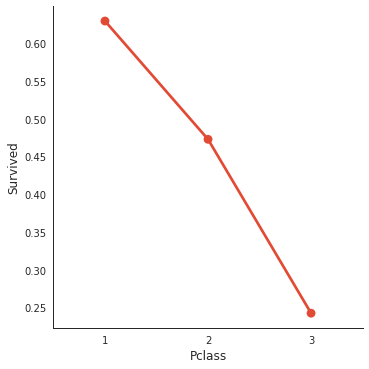

In [46]:
sns.catplot('Pclass','Survived', kind='point', data=df, ci=None);

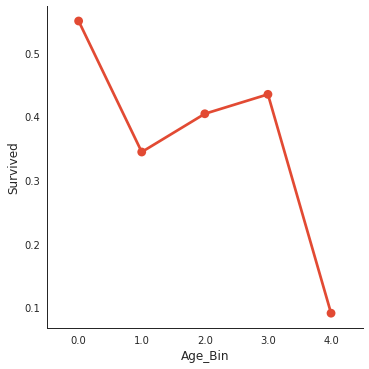

In [47]:
sns.catplot('Age_Bin','Survived', kind='point', data=df, ci=None);

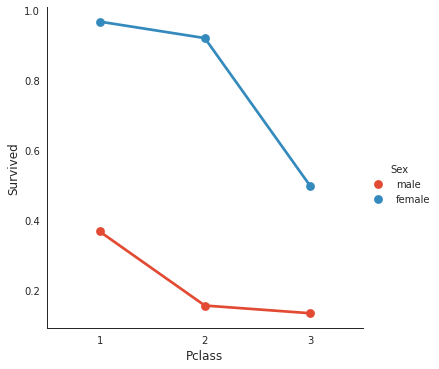

In [48]:
sns.catplot('Pclass','Survived', hue='Sex', kind='point', data=df, ci=None);

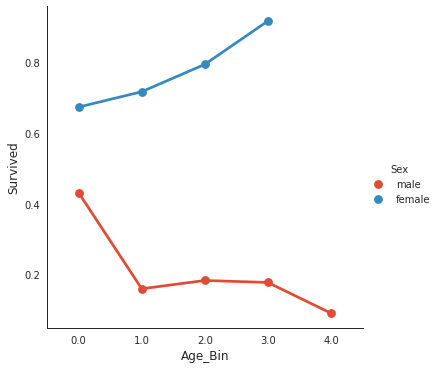

In [49]:
sns.catplot('Age_Bin','Survived', hue='Sex', kind='point', data=df, ci=None);

In [50]:
thresholds = mapper_quantizer.built_features[0][1].bin_edges_[0]
for id, (a, b) in enumerate(zip(thresholds[:-1],thresholds[1:])):
    print('bin {} start {:5.2f} {:>5.2f}'.format(id,a,b))

bin 0 start  0.42 16.34
bin 1 start 16.34 32.25
bin 2 start 32.25 48.17
bin 3 start 48.17 64.08
bin 4 start 64.08 80.00


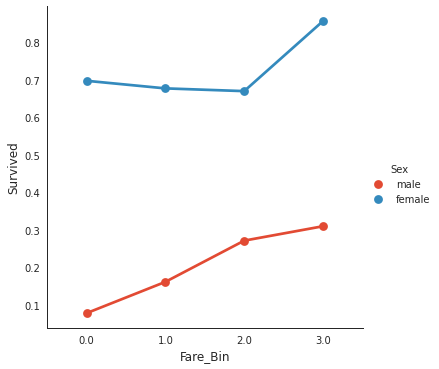

In [51]:
sns.catplot('Fare_Bin','Survived', hue='Sex', kind='point', data=df, ci=None);

In [52]:
thresholds = mapper_quantizer.built_features[1][1].bin_edges_[0]
for id, (a, b) in enumerate(zip(thresholds[:-1],thresholds[1:])):
    print('bin {} start {:5.2f} {:>5.2f}'.format(id,a,b))

bin 0 start  0.00  7.91
bin 1 start  7.91 14.45
bin 2 start 14.45 31.00
bin 3 start 31.00 512.33


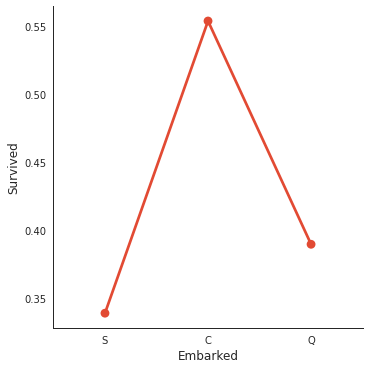

In [53]:
sns.catplot('Embarked','Survived', kind='point', data=df, ci=None);

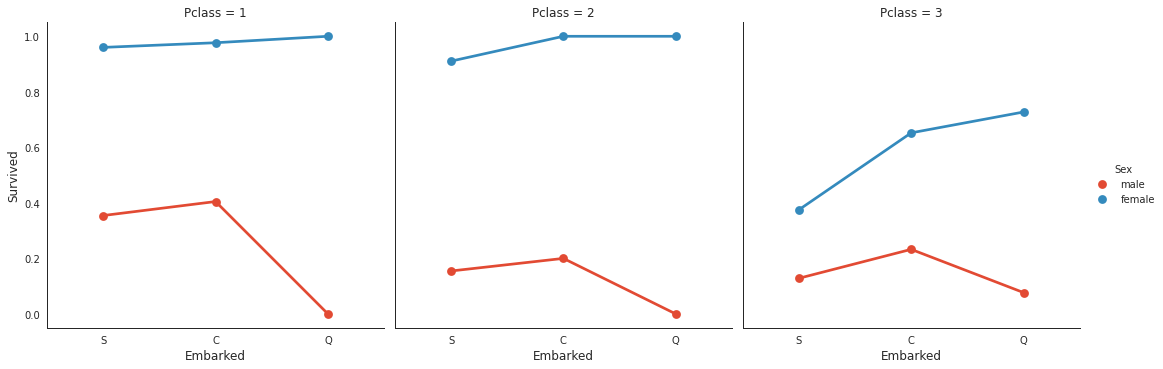

In [54]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df, ci=None);

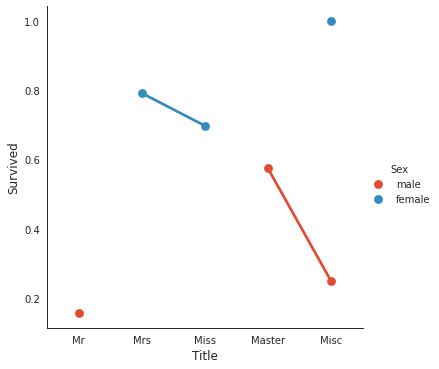

In [55]:
sns.catplot('Title','Survived', hue='Sex', kind='point', data=df, ci=None);

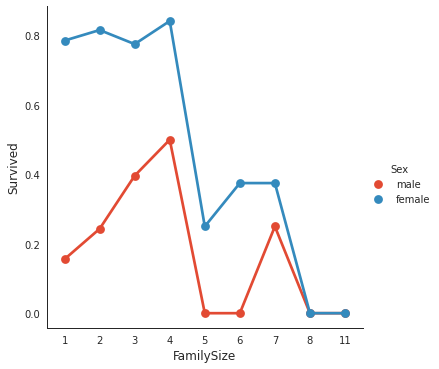

In [56]:
sns.catplot('FamilySize','Survived', hue='Sex', kind='point', data=df, ci=None);

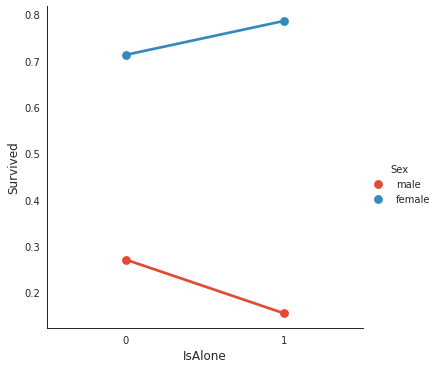

In [57]:
sns.catplot('IsAlone','Survived', hue='Sex', kind='point', data=df, ci=None);

In [58]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age_Bin      891 non-null    float64
 1   Fare_Bin     891 non-null    float64
 2   Embarked     891 non-null    object 
 3   PassengerId  891 non-null    object 
 4   Pclass       891 non-null    object 
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   FamilySize   891 non-null    object 
 9   IsAlone      891 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), object(9)
memory usage: 76.7+ KB


In [59]:
df_features.sample(10)

,Age_Bin,Fare_Bin,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,FamilySize,IsAlone,Title
687,1.0,1.0,S,688,3,male,0,0,1,1,Mr
647,3.0,3.0,C,648,1,male,0,0,1,1,Misc
753,1.0,0.0,S,754,3,male,0,0,1,1,Mr
819,0.0,2.0,S,820,3,male,3,2,6,0,Master
351,1.0,3.0,S,352,1,male,0,0,1,1,Mr
795,2.0,1.0,S,796,2,male,0,0,1,1,Mr
519,1.0,0.0,S,520,3,male,0,0,1,1,Mr
442,1.0,0.0,S,443,3,male,1,0,2,0,Mr
130,2.0,0.0,C,131,3,male,0,0,1,1,Mr
239,2.0,1.0,S,240,2,male,0,0,1,1,Mr


# 7 Format Transformation: CATEGORICAL data to OneHot

OneHotEncoder is aimed to transform "list of alphanumeric values" into a vector of 0's and 1.

In [60]:
df_features = pd.get_dummies(df_features, columns=['Sex','Embarked','Title'], drop_first=True)

In [61]:
df_features.sample(10)

,Age_Bin,Fare_Bin,PassengerId,Pclass,SibSp,Parch,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
257,1.0,3.0,258,1,0,0,1,1,0,0,1,0,1,0,0
400,2.0,1.0,401,3,0,0,1,1,1,0,1,0,0,1,0
780,0.0,0.0,781,3,0,0,1,1,0,0,0,0,1,0,0
671,1.0,3.0,672,1,1,0,2,0,1,0,1,0,0,1,0
668,2.0,1.0,669,3,0,0,1,1,1,0,1,0,0,1,0
493,4.0,3.0,494,1,0,0,1,1,1,0,0,0,0,1,0
500,1.0,1.0,501,3,0,0,1,1,1,0,1,0,0,1,0
768,1.0,2.0,769,3,1,0,2,0,1,1,0,0,0,1,0
826,1.0,3.0,827,3,0,0,1,1,1,0,1,0,0,1,0
714,3.0,1.0,715,2,0,0,1,1,1,0,1,0,0,1,0


# 8 Machine Learning (at last!)

## 8.1 Train/test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_features[[ x for x in df_features.columns.tolist() if x != 'PassengerId']],
                                                    df_labels[[ x for x in df_labels.columns.tolist() if x != 'PassengerId']],
                                                    random_state = 0)

## 8.2 Support Vector Machines

In [63]:
param_grid = [{'kernel': ['rbf'], 'C': [10, 100, 1000], 'gamma' : [1e-2, 1e-3, 1e-4]},
              {'kernel': ['linear'], 'C': [1, 10, 100]}]

gcv = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=4)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}])

In [64]:
mu = gcv.cv_results_['mean_test_score']
std = gcv.cv_results_['std_test_score']
pars = gcv.cv_results_['params']
for (m,s,p) in zip(mu,std,pars):
    print('%.2f (+-%.2f): %s' %(m,s,p))

0.82 (+-0.02): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.80 (+-0.02): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.61 (+-0.00): {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.84 (+-0.02): {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.79 (+-0.02): {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.82 (+-0.02): {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.81 (+-0.03): {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.82 (+-0.03): {'C': 1, 'kernel': 'linear'}
0.83 (+-0.03): {'C': 10, 'kernel': 'linear'}
0.83 (+-0.03): {'C': 100, 'kernel': 'linear'}


In [65]:
print('hyperparams: %s' % gcv.best_params_)

hyperparams: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## 8.3 Results on Test set

In [66]:
pred = gcv.predict(X_test)

### 8.3.1 Precision/Accuracy/Recall

In [67]:
print(classification_report(y_test, pred))
print('accuracy %.2f' % accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.77      0.74      0.75        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223

accuracy 0.82


### 8.3.2 Confusion Matrix

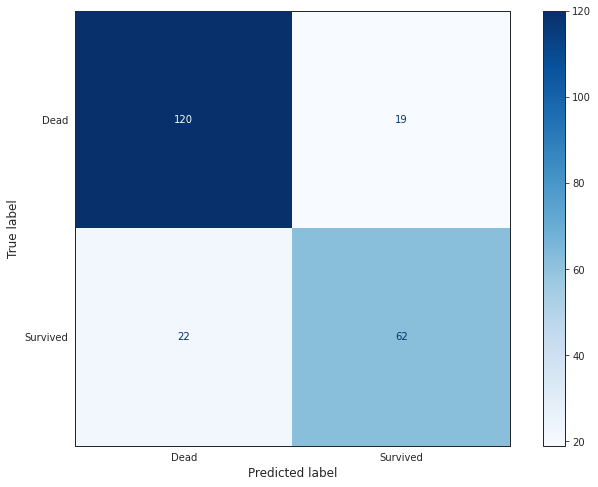

In [68]:
plot_confusion_matrix(gcv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Dead', 'Survived'])

8.3.3 Confusion Matrix (normalization on true labels &#8594; Recall)

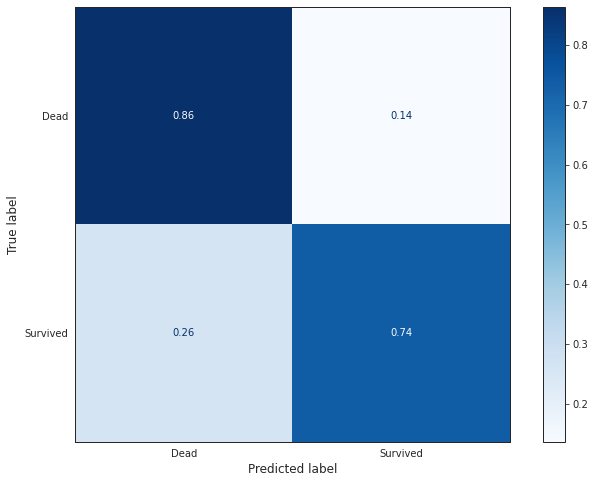

In [69]:
plot_confusion_matrix(gcv, X_test, y_test, normalize='true', cmap=plt.cm.Blues, display_labels=['Dead', 'Survived'])